## Inspecting the tf run output for the custom kanto classifier


### Inspect the files contents

In [1]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import os

# Path to your .tfevents file
tfevents_paths = [
    "../final-runs/events.out.tfevents.resnet-not-pretrained",
]

# Read the file and print available tags and data
print("Reading tfevents files...\n")
for tfevents_path in tfevents_paths:
    print(f"Processing file: {os.path.basename(tfevents_path)}")
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            print(f"Step: {event.step}, Tag: {value.tag}, Value: {value.simple_value}")


2024-12-18 22:07:08.749610: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-18 22:07:08.765623: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Reading tfevents files...

Processing file: events.out.tfevents.resnet-not-pretrained
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Step: 55, Tag: Batch Loss, Value: 6.418704032897949
Step: 65, Tag: Batch Loss, Value: 5.45302152633667
Step: 75, Tag: Batch Loss, Value: 5.125644683837891
Step: 85, Tag: Batch Loss, Value: 5.0660881996154785
Step: 95, Tag: Batch Loss, Value: 4.944477081298828
Step: 105, Tag: Batch Loss, Value: 4.908626556396484
Step: 1, Tag: Epoch Training Loss, Value: 5.218620777130127
Step: 1, Tag: Epoch Training Accuracy, Value: 2.7672035694122314
Step: 1, Tag: Training Precision, Value: 1.2607132196426392
Step: 1, Tag: Training Recall, Value: 1.653853416442871
Step: 1, Tag: Training F1 Score, Value: 0.8847553133964539
Step: 1, Tag: Training Learning Rate, Value: 0.0005000000237487257
Step: 2, Tag: Epoch Validation Accuracy, Value: 6.148440837860107
Step: 2, Tag: Epoch Validation Loss, Value: 4.712991714477539
Step: 2, Tag: Epoch V

In [2]:
# Check each unique tag in the file

tags = set()
for tfevents_path in tfevents_paths:
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            tags.add(value.tag)

print("\nUnique tags in the file:")
for tag in tags:
    print(tag)


Unique tags in the file:
Training Recall
Class Accuracy/Charmander
Class Accuracy/MrMime
Class Accuracy/Dratini
Per-Class Accuracy
Class Accuracy/Krabby
Class Accuracy/Exeggcute
Class Accuracy/Psyduck
Class Accuracy/Alakazam
Class Accuracy/Starmie
Class Accuracy/Jynx
Class Accuracy/Magneton
Class Accuracy/Voltorb
Class Accuracy/Paras
Class Accuracy/Flareon
Class Accuracy/Kingler
Class Accuracy/Goldeen
Class Accuracy/Horsea
Class Accuracy/Onix
Epoch Training Loss
Class Accuracy/Slowpoke
Class Accuracy/Staryu
Class Accuracy/Pidgey
Class Accuracy/Ponyta
Class Accuracy/Abra
Class Accuracy/Seaking
Epoch Validation Precision
Class Accuracy/Mew
Class Accuracy/Venusaur
Class Accuracy/Golduck
Class Accuracy/Poliwrath
Class Accuracy/Aerodactyl
Class Accuracy/Persian
Class Accuracy/Raticate
Class Accuracy/Golbat
Class Accuracy/Caterpie
Class Accuracy/Kangaskhan
Class Accuracy/Charizard
Class Accuracy/Poliwag
Class Accuracy/Lapras
Class Accuracy/Scyther
Class Accuracy/Dewgong
Class Accuracy/Tange

Epoch 1: Training Loss = 5.218620777130127
Epoch 1: Training Accuracy = 2.7672035694122314
Epoch 2: Validation Accuracy = 6.148440837860107
Epoch 2: Validation Loss = 4.712991714477539
Epoch 2: Training Loss = 4.655822277069092
Epoch 2: Training Accuracy = 7.800649642944336
Epoch 3: Validation Accuracy = 15.737080574035645
Epoch 3: Validation Loss = 3.94573712348938
Epoch 3: Training Loss = 4.445695877075195
Epoch 3: Training Accuracy = 13.536938667297363
Epoch 4: Validation Accuracy = 20.49480438232422
Epoch 4: Validation Loss = 3.815847635269165
Epoch 4: Training Loss = 4.288857936859131
Epoch 4: Training Accuracy = 19.402067184448242
Epoch 5: Validation Accuracy = 28.663448333740234
Epoch 5: Validation Loss = 4.62575626373291
Epoch 5: Training Loss = 4.1774067878723145
Epoch 5: Training Accuracy = 24.7547664642334
Epoch 6: Validation Accuracy = 34.431270599365234
Epoch 6: Validation Loss = 4.069233417510986
Epoch 6: Training Loss = 4.064335346221924
Epoch 6: Training Accuracy = 29.6

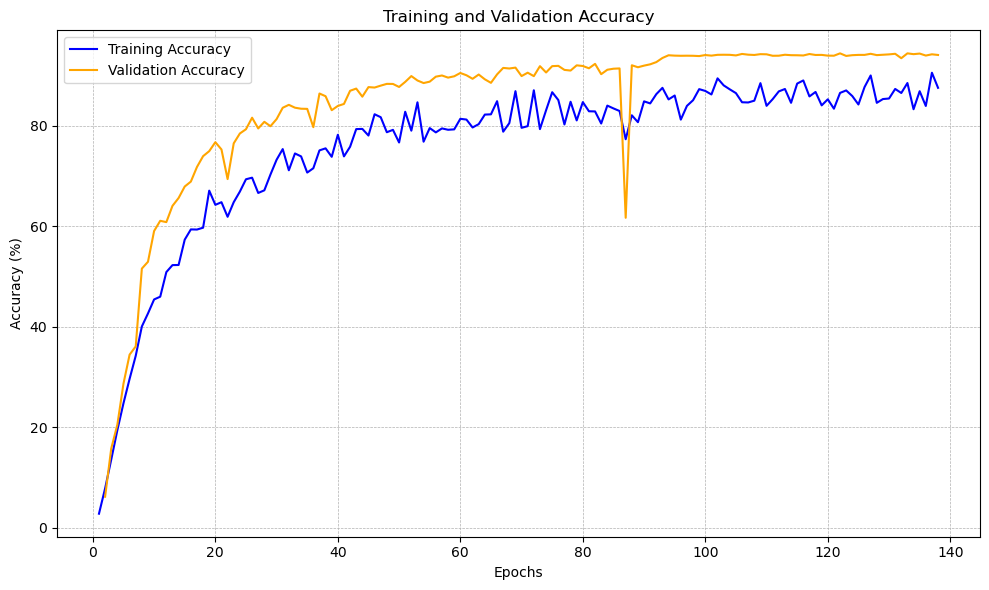

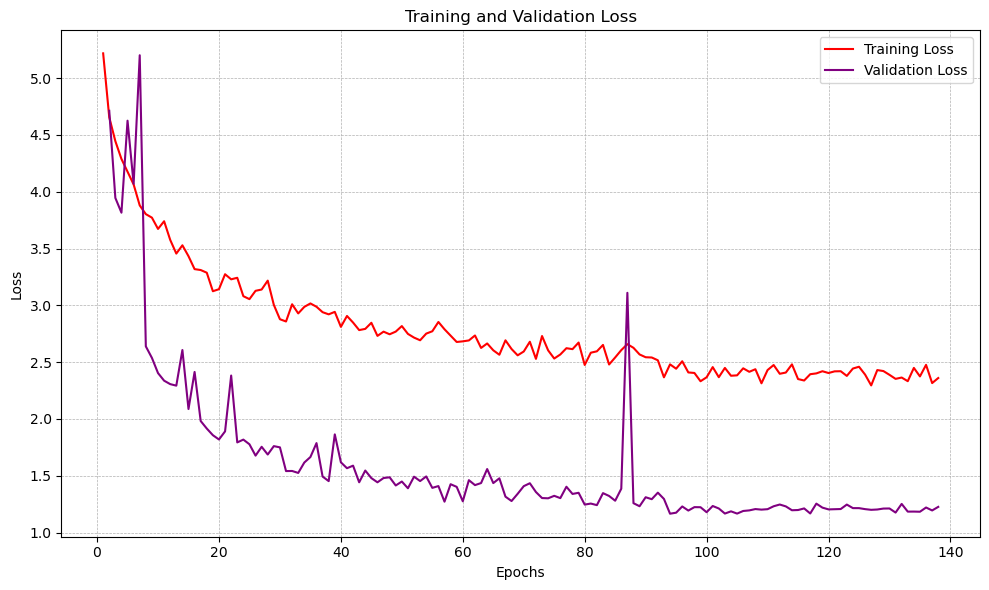

In [3]:
import os
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt


# Initialize empty lists for metrics
epoch_steps_train = []
epoch_train_accuracy = []
epoch_train_loss = []
epoch_steps_val = []
epoch_val_accuracy = []
epoch_val_loss = []

# Initalize empty lists for batch metrics
batch_steps_train = []
batch_loss = []

# Parse the tfevents file
for tfevents_path in tfevents_paths:
    for summary in summary_iterator(tfevents_path):
        for value in summary.summary.value:
            if value.tag == "Epoch Training Accuracy":  # Training accuracy
                epoch_steps_train.append(summary.step)
                print(f"Epoch {summary.step}: Training Accuracy = {value.simple_value}")
                epoch_train_accuracy.append(value.simple_value)
            elif value.tag == "Epoch Validation Accuracy":  # Validation accuracy
                print(f"Epoch {summary.step}: Validation Accuracy = {value.simple_value}")
                epoch_steps_val.append(summary.step)
                epoch_val_accuracy.append(value.simple_value)
            elif value.tag == "Epoch Training Loss":  # Training loss
                print(f"Epoch {summary.step}: Training Loss = {value.simple_value}")
                epoch_train_loss.append(value.simple_value)
            elif value.tag == "Epoch Validation Loss": # Validation loss
                print(f"Epoch {summary.step}: Validation Loss = {value.simple_value}")
                epoch_val_loss.append(value.simple_value)
            elif value.tag == "Batch Loss":  # Batch loss
                batch_steps_train.append(summary.step)
                batch_loss.append(value.simple_value)

#print final values
print("\n")
print("Final epoch: ", epoch_steps_train[-1])
print("Final Training Accuracy: ", epoch_train_accuracy[-1])
print("Final Validation Accuracy: ", epoch_val_accuracy[-1])
print("Final Training Loss: ", epoch_train_loss[-1])
print("Final Validation Loss: ", epoch_val_loss[-1])
print("Final Batch Loss: ", batch_loss[-1])

# Plot 1: Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epoch_steps_train, epoch_train_accuracy, label="Training Accuracy", color="blue")
plt.plot(epoch_steps_val, epoch_val_accuracy, label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot 2: Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epoch_steps_train, epoch_train_loss, label="Training Loss", color="red")
plt.plot(epoch_steps_val, epoch_val_loss, label="Validation Loss", color="purple")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


# # Plot 3: Batch Loss
# plt.figure(figsize=(10, 6))
# plt.plot(batch_steps_train, batch_loss, label="Batch Loss", color="green", linestyle="-.")
# plt.xlabel("Steps")
# plt.ylabel("Loss")
# plt.title("Batch Loss")
# plt.legend()
# plt.grid(visible=True, linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.show()



Reading tfevents file...

Top 10 Best Class Accuracies:
1. Eevee: 100.00%
2. Flareon: 100.00%
3. Ivysaur: 100.00%
4. Jynx: 100.00%
5. Magikarp: 100.00%
6. Magmar: 100.00%
7. Paras: 100.00%
8. Poliwag: 100.00%
9. Rattata: 100.00%
10. Tentacruel: 100.00%


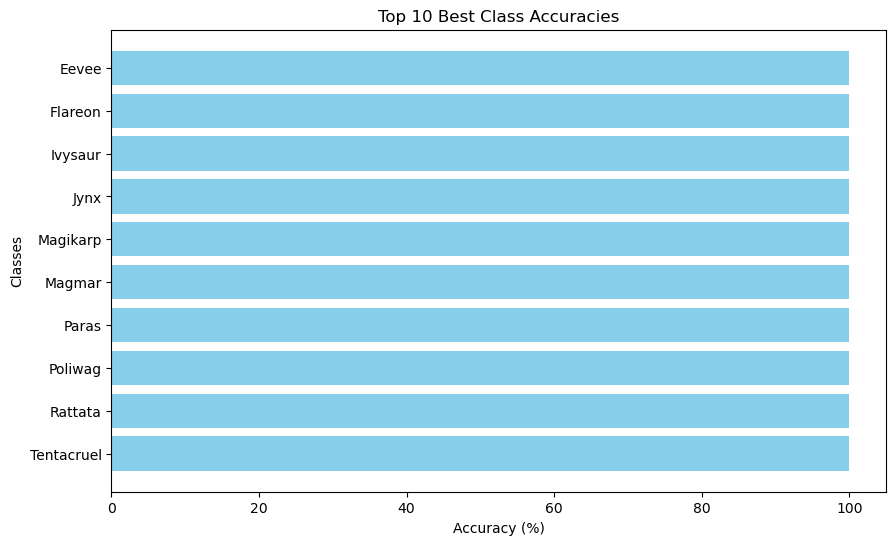

Top 10 Worst Class Accuracies:
1. Nidoran-f: 53.85%
2. Muk: 68.57%
3. Onix: 69.23%
4. Nidorino: 80.65%
5. Ninetales: 82.22%
6. Grimer: 82.50%
7. Rhyhorn: 83.33%
8. Weezing: 83.33%
9. Poliwrath: 83.67%
10. Pidgeotto: 84.09%


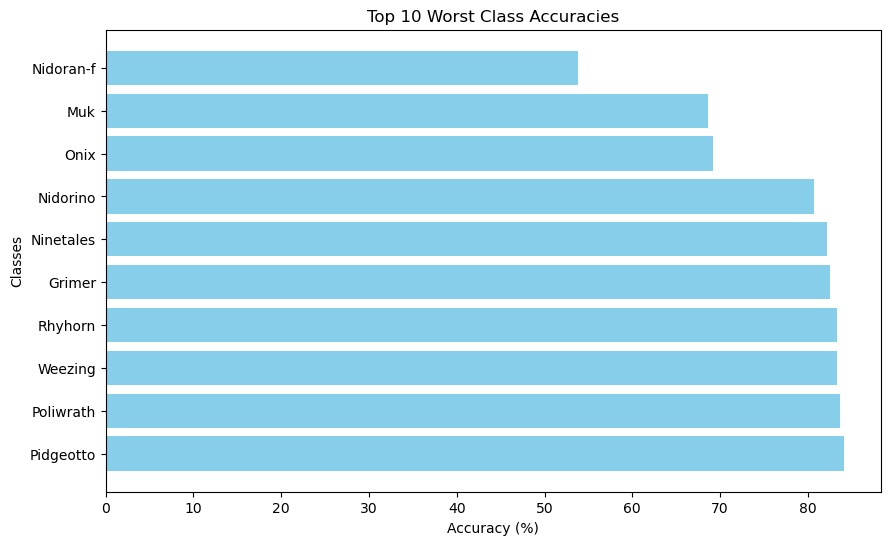

In [4]:
# Get top 10 best class accuracy

from tensorflow.python.summary.summary_iterator import summary_iterator
import re
import matplotlib.pyplot as plt

# Regex pattern to match "Class Accuracy/*"
pattern = r"Class Accuracy/([\w\s-]+)"

# Dictionary to store class accuracies
class_accuracies = {}

# Read the tfevents file
print("Reading tfevents file...\n")
for tfevents_path in tfevents_paths:
    for event in summary_iterator(tfevents_path):
        for value in event.summary.value:
            # Check if the tag matches "Class Accuracy/*"
            match = re.match(pattern, value.tag)
            if match:
                class_name = match.group(1)  # Extract class name
                class_accuracies[class_name] = value.simple_value  # Store the accuracy

# Sort the classes by accuracy in descending order and select the top 10
top_10 = sorted(class_accuracies.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract class names and accuracies for plotting
classes, accuracies = zip(*top_10)

# Print the top 10 class accuracies
print("Top 10 Best Class Accuracies:")
for i, (class_name, accuracy) in enumerate(top_10):
    print(f"{i + 1}. {class_name}: {accuracy:.2f}%")

# Plot the top 10 class accuracies
plt.figure(figsize=(10, 6))
plt.barh(classes, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.ylabel('Classes')
plt.title('Top 10 Best Class Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# now lets get the worst 10 class accuracy
worst_10 = sorted(class_accuracies.items(), key=lambda x: x[1], reverse=False)[:10]

# Extract class names and accuracies for plotting
classes, accuracies = zip(*worst_10)

# Print the top 10 class accuracies
print("Top 10 Worst Class Accuracies:")
for i, (class_name, accuracy) in enumerate(worst_10):
    print(f"{i + 1}. {class_name}: {accuracy:.2f}%")

# Plot the top 10 class accuracies
plt.figure(figsize=(10, 6))
plt.barh(classes, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.ylabel('Classes')
plt.title('Top 10 Worst Class Accuracies')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()



